In [315]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [316]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [317]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [318]:
#store the database path
database_path = "../Resources/hawaii.sqlite"

In [319]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
Base = automap_base()

In [320]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables

In [321]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [322]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [323]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [324]:
# Find the most recent date in the data set (method 1).
dates_list = []
for row in session.query(Measurement.date).all():
    dates_list.append(row)

dates_df = pd.DataFrame(dates_list)
dates_df.sort_values
print(dates_df.max())


date    2017-08-23
dtype: object


In [325]:
# Find the most recent date in the data set (better method).
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [326]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
cutoff_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > cutoff_date).all()
prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp)
prcp_df



# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


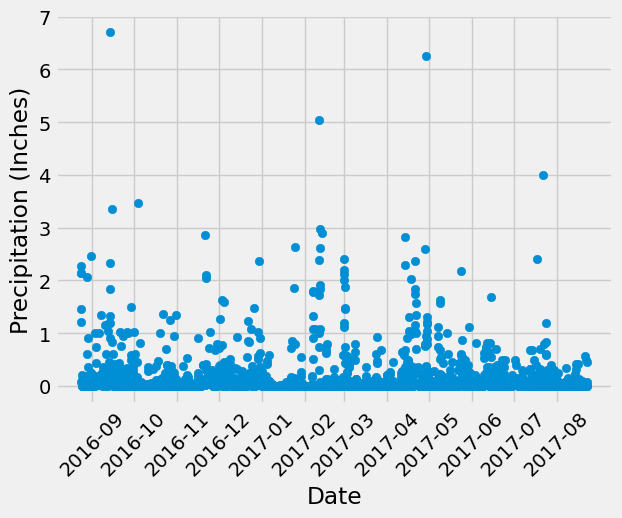

In [327]:
# Convert 'date' column to datetime
prcp_df['date'] = pd.to_datetime(prcp_df['date'])

# Use Pandas Plotting with Matplotlib to plot the data (scatter plot)
x_values = prcp_df['date']
y_values = prcp_df['prcp']
plt.scatter(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')

# Customize x-axis ticks to show first and last date, and one month increments
plt.gca().set_xticks(pd.date_range(start=x_values.min(), end=x_values.max(), freq='MS'))
plt.gca().set_xticklabels(pd.date_range(start=x_values.min(), end=x_values.max(), freq='MS').strftime('%Y-%m'), rotation=45)

plt.show()


In [328]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
prcp_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [329]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Measurement.station).count()
num_stations


19550

In [330]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [331]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temps_df = pd.DataFrame(most_active_station_temps)
min_temp = temps_df.min()
max_temp = temps_df.max()
avg_temp = temps_df.mean()
print(f"Station USC00519281 min temp: {min_temp}")
print(f"Station USC00519281 max temp: {max_temp}")
print(f"Station USC00519281 avg temp: {avg_temp}")
      


Station USC00519281 min temp: tobs    54.0
dtype: float64
Station USC00519281 max temp: tobs    85.0
dtype: float64
Station USC00519281 avg temp: tobs    71.663781
dtype: float64


In [332]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
cutoff_date_12month = '2016-08-23'
last_12_months_temps = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > cutoff_date_12month)).all()
last_12_months_temps_df = pd.DataFrame(last_12_months_temps)
last_12_months_temps_df


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


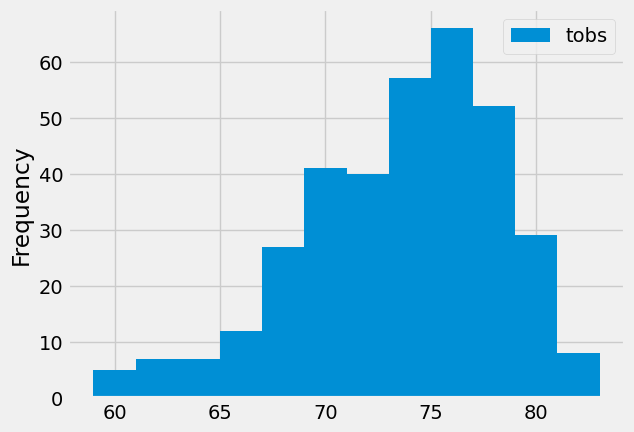

In [333]:
# plot the results as a histogram
last_12_months_temps_df.plot.hist(bins=12)
plt.show()


# Close Session

In [334]:
# Close Session
session.close()